Importaciones

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD

Lectura archivos y variables

In [2]:
dataframe = pd.read_csv('house_price.csv')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Análisis

In [4]:
dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Pearson

<AxesSubplot:>

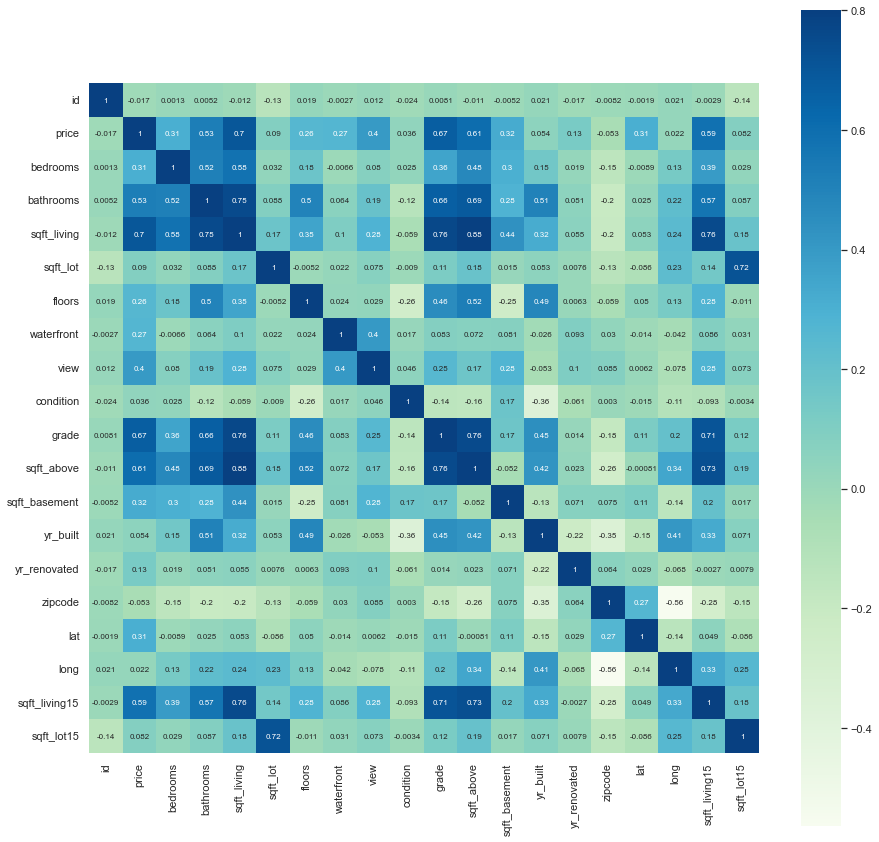

In [5]:
sns.set(style='whitegrid',font_scale = 1)
plt.figure(figsize = (15,15))
sns.heatmap(dataframe.corr(),vmax=.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

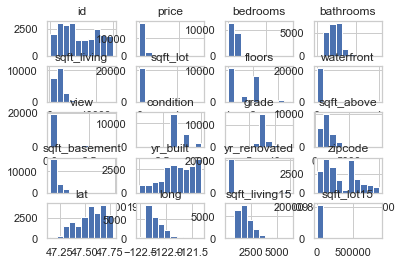

In [6]:
dataframe.hist()

Limpieza

In [7]:
#zipcode lat long lot15 sqft_lot
dataframe = dataframe.drop('zipcode',axis=1)
dataframe=dataframe.drop("lat",axis=1)
dataframe=dataframe.drop("long",axis=1)
dataframe=dataframe.drop("sqft_lot15",axis=1)
dataframe=dataframe.drop("sqft_lot",axis=1)
dataframe=dataframe.drop("id",axis=1)

In [8]:
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe['month']=dataframe['date'].apply(lambda date:date.month)
dataframe['year']=dataframe['date'].apply(lambda date:date.year)
dataframe=dataframe.drop("date",axis=1)

In [9]:
dataframe

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,month,year
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180.0,0,1955,0,1340,10,2014
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170.0,400,1951,1991,1690,12,2014
2,180000.0,2,1.00,770,1.0,0,0,3,6,770.0,0,1933,0,2720,2,2015
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050.0,910,1965,0,1360,12,2014
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680.0,0,1987,0,1800,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8,1530.0,0,2009,0,1530,5,2014
21609,400000.0,4,2.50,2310,2.0,0,0,3,8,2310.0,0,2014,0,1830,2,2015
21610,402101.0,2,0.75,1020,2.0,0,0,3,7,1020.0,0,2009,0,1020,6,2014
21611,400000.0,3,2.50,1600,2.0,0,0,3,8,1600.0,0,2004,0,1410,1,2015


In [10]:
dataframe=dataframe.fillna(dataframe.mean())

In [11]:
dataframe.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
month            0
year             0
dtype: int64

In [12]:
X = dataframe.drop('price',axis=1)
y = dataframe['price']

In [13]:
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,month,year
0,3,1.00,1180,1.0,0,0,3,7,1180.0,0,1955,0,1340,10,2014
1,3,2.25,2570,2.0,0,0,3,7,2170.0,400,1951,1991,1690,12,2014
2,2,1.00,770,1.0,0,0,3,6,770.0,0,1933,0,2720,2,2015
3,4,3.00,1960,1.0,0,0,5,7,1050.0,910,1965,0,1360,12,2014
4,3,2.00,1680,1.0,0,0,3,8,1680.0,0,1987,0,1800,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,3,8,1530.0,0,2009,0,1530,5,2014
21609,4,2.50,2310,2.0,0,0,3,8,2310.0,0,2014,0,1830,2,2015
21610,2,0.75,1020,2.0,0,0,3,7,1020.0,0,2009,0,1020,6,2014
21611,3,2.50,1600,2.0,0,0,3,8,1600.0,0,2004,0,1410,1,2015


In [14]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [15]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X)
X = minmaxscaler.transform(X)

Entrenamiento y Testeo

In [16]:
#X #y
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=50, test_size=0.30)

In [17]:
ann = Sequential()
ann.add(Dense(14,activation='relu'))
ann.add(Dense(7,activation='relu'))
ann.add(Dense(1))
sgd = SGD(lr=0.02,momentum=0.7)
ann.compile(optimizer='adam', loss='mean_squared_error')
#rmsprop adam sgd
#categorical_crossentropy binary_crossentropy metrics='accuracy'
ann.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=5000,epochs=350,verbose=1)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/350


2022-06-15 09:55:58.710632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-15 09:55:58.710953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/miniconda3/envs/mlp/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2022-06-15 09:55:58.860992: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - ETA: 0s - loss: 423762690048.0000

2022-06-15 09:55:59.092886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 51ms/step - loss: 423762690048.0000 - val_loss: 432792240128.0000
Epoch 2/350
4/4 [==============================] - 0s 14ms/step - loss: 423762558976.0000 - val_loss: 432792174592.0000
Epoch 3/350
4/4 [==============================] - 0s 13ms/step - loss: 423762493440.0000 - val_loss: 432792076288.0000
Epoch 4/350
4/4 [==============================] - 0s 15ms/step - loss: 423762395136.0000 - val_loss: 432791977984.0000
Epoch 5/350


2022-06-15 09:55:59.335523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 14ms/step - loss: 423762329600.0000 - val_loss: 432791912448.0000
Epoch 6/350
4/4 [==============================] - 0s 13ms/step - loss: 423762264064.0000 - val_loss: 432791781376.0000
Epoch 7/350
4/4 [==============================] - 0s 13ms/step - loss: 423762132992.0000 - val_loss: 432791748608.0000
Epoch 8/350
4/4 [==============================] - 0s 13ms/step - loss: 423762067456.0000 - val_loss: 432791683072.0000
Epoch 9/350
4/4 [==============================] - 0s 13ms/step - loss: 423762034688.0000 - val_loss: 432791584768.0000
Epoch 10/350
4/4 [==============================] - 0s 12ms/step - loss: 423761969152.0000 - val_loss: 432791519232.0000
Epoch 11/350
4/4 [==============================] - 0s 13ms/step - loss: 423761870848.0000 - val_loss: 432791420928.0000
Epoch 12/350
4/4 [==============================] - 0s 13ms/step - loss: 423761805312.0000 - val_loss: 432791355392.0000
Epoch 13/350
4/4 [==============================]

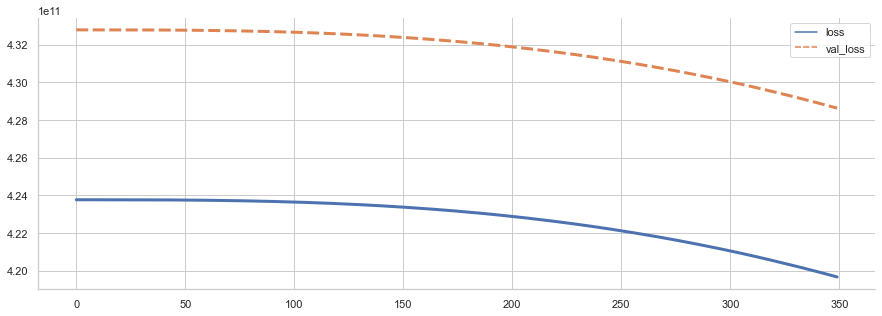

In [18]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()